<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/17_Language_Models_are_Unsupervised_Multitask_Learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language Models are Unsupervised Multitask Learners GPT2

## Why GPT-2 

- Unsupervised Model 
    - 이전까지의 Machine Learning system
        1. Large dataset + high-capacity model + supervised learning
        2. 특정한 task에서는 좋은 성능
        3. 하지만, task 별로 dataset & model 필요
        4. Data distribution과 task specification에 민감(narrow experts)
        


## Previous Work

1. Pre-training + Fine-tunning 
    - BERT, GPT-1 etc,
    - Pros
        1. Task-specific architecture 필요 x
        2. Self-attention block 많이 transfer하면 됨

    - Cons
        1. Fins-tuning 시 여전히 필요한 supervised data

- 목표 : Multi-tasking general system
    1. Task-specific dataset & model 필요 없는 
    2. 여러 task 수행 가능한 


## GPT-2

- Language Modeling for General system
    1. supervised data가 얼마 없거나 없을 때 Language Model이 task 수행하도록 하자 
    2. Zero-shot setting (Parameter & architecture 수정 x)에서 LM이 down-stream task 수행
    3. LM은 보통 symbol sequence의 분포 추정하는 것으로 정의
    4. Single task : p(output | input)
    5. Multi task : p(output | input, task)
    6. Language model이 충분한 용량을 가진다면 unsupervised multitask learning이 가능해질 것 



## Model Specification

###Training Dataset 


- Prior works
    1. Single domain dataset에서 LM 훈련
    2. Common Crawl 
        - 웹 스크랩 데이터
        - Data quality issues

- WebText
    1. Common Crawl같은 웹 스크랩 데이터셋의 quality issue 해결
    2. Reddit에서 3 karma 넘는 외부링크만 스크랩
    3. 40GB text
    4. ENGLISH
    5. GPT-2는 WebText에 underfit됨


###Input Representation

BPE(Byte Pair Encoding)
1. Character level과 word level 중간정도의 방식
    - 둘의 장점을 합쳐 놓음
    - Character (infrequent symbol sequence) / word(frequent symbol sequence)

2. For any dataset
    - Unicode string에 확률 할당
    - 어떤한 dataset에도 LM평가 가능
    

### Model 

### Architecture 


GTP-1 detail에 약간의 수정 
1. Layer Normalization : 각 sub-block input으로 이동 / self-attention 마지막에 추가 
2. Vocabulary size : 50,257로 증가
3. Context size : 512 -> 1024
4. Batch size : 512



## Experiments

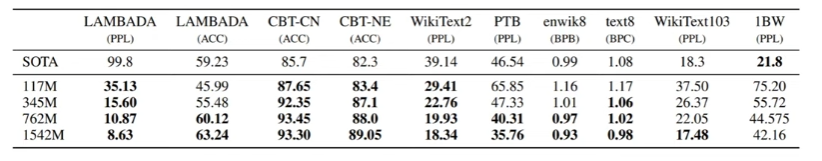

1BW 제외 모두 SoTA 달성
- 1BW의 전처리 방식 때문
- Sentenct level shuffling 때문에 long-range structure 파괴됨

Dataset 
1. CBT 
    - 여러 종류의 단어에 대한 LM 성능 평가
    - Named-entities, nouns, verbs, prepositions

2. LAMBADA
    - Long-range dependency modeling 성능평가
    - 최소 50개 context token 이상 필요한 문장 마지막 단어 예측

Winograd Schema Challenge 
: 문장의 모호함을 해결 


- Commonsense reasoning 성능 평가 가능 
- Named-entitied, nouns,verbs,prepositions

1. Full score : 전체 문장이 얼마나 자연스러운지 
2. Partial score : 앞 부분이 주어졌을 때 나머지가 얼마나 자연스러운지 



## Other tasks 

1. Reading Comprehension
    - CoQA dataset
    - 55 F1 score (SoTA: BERT, 90 F1 score)
    - supervised training 없이 이정도 성능 나옴에 기대

2. Summarization
    - CNN and Daily Mail dataset
    - Task 유도용으로 TL; DR; 추가
    - 성능 별로 안 좋음
    - Article의 최근 content나 detail 부분에 focusing 하는 경우 많아서

3. Trainslation
    - WMT-14 English-French, WMT-14 French-English
    - English-French : 5 BLEU
    - French-English : 11.5 BLEU
    - WebText dataset에 프랑스어 10MB 밖에 없어서

4. Question Answering
    - Natural Questions dataset, SQuAD
    - 4.1% 정답



1. Data overlap
    - Train data와 test data가 많이 중복될 경우 생김
    - 중복 많은 경우 generalization 성능 over-reporting
    - 얼마나 겹치는지 분석하는 것이 중요함

2. WebText dataset
    - 다른 LM benchmark datasets와 평균 3.2% overlap
    - 다른 datasets는 평균 5.9% overlap



## Conclusion

1. 한계
    - 많은 task에서 좋은 결과는 내지 못함 
    - training data WebText에 underfitting
    - Uni-directional representation

2. 기대
    - Language Model의 capacity가 down-stream task 성능에 영향을 주는 것을 확인 
    - 더 큰 capacity의 LM 만든다면 성능 더 좋아질 것 
    - Fine-tunning 추가 시 성능 개선 기대 ( + uni-directional representation 단점 극복 기대) 
    